# 00: Perceptron

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/00-perceptron/00-perceptron-exercise.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/00-perceptron/00-perceptron.ipynb)

So let's start now with just building from the ground up the fundamental building block of 
every single neural network and that's going to be just a single neuron and in neural network language a single neuron is called a `perceptron`. 

The perceptron is a simple single layer neural network that takes an input vector $\boldsymbol{x} = [x_1, x_2, ..., x_n]$, multiplies it by a weight vector $\boldsymbol{w} = [w_1, w_2, ..., w_n]$, sums the weighted inputs, and passes the $\sum_i w_ix_i$ added to a bias $w_0$ as $z =  w_0 +  \sum_i w_ix_i$  through an activation function $g(z)$ to produce an output $\hat{y}$:

$$z = \mathrm{bias} + \mathrm{linear\_ combination\_ of \_ inputs}$$
$$z = w_0 + \boldsymbol{w}^T\boldsymbol{x} = w_0 +  \sum_i w_ix_i $$
$$\hat{y} = g(z) $$

The activation function $g$ introduces nonlinearity to allow the perceptron to learn complex mappings from inputs to outputs. Typical choices for $g$ are `sigmoid`, `tanh`, or `ReLU` functions, though the original perceptron used a step function.

The perceptron can be trained via supervised learning, adjusting the weights and biases to minimize the loss between the predicted $\hat{y}$ and the true label $y^{\text{true}}$. Backpropagation combined with gradient descent can be used to iteratively update the weights to reduce the loss.

The key components of a perceptron are:
* Input vector $\boldsymbol{x}$
* Weight vector $\boldsymbol{w}$
* Weighted sum $z = \boldsymbol{w}^T\boldsymbol{x}$
* Nonlinear activation $g$
* Output prediction $\hat{y}$

The perceptron provides a basic model of a neuron, and multilayer perceptrons composed of many interconnected perceptrons can be used to build neural networks with substantial representational power. A perceptron takes a set of inputs, scales them by corresponding weights, sums them together with a bias, applies a non-linear step function, and produces an output. This simple model can represent linear decision boundaries and serves as a building block for more complex neural networks. In training, weights are updated based on the difference between the predicted output and the actual label, often using the Perceptron learning algorithm.


![Perceptron](perceptron.png)

> Credits: Alexander Amini, MIT

## Weights and biases

The weights and biases are the parameters of the perceptron that allow it to learn complex mappings from inputs to outputs.

The weights $w_i$ determine how much influence each input $x_i$ has on the output. Inputs with higher weights have a larger impact. The bias $b$ allows the perceptron to shift the decision boundary away from the origin

The input vector:

$\boldsymbol{x} = [x_1, x_2, ..., x_n]$

The weight vector:

$\boldsymbol{w} = [w_1, w_2, ..., w_n]$

Mathematically, the weighted sum is calculated as:

$z = \boldsymbol{w}^T\boldsymbol{x} = w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$

We then add the bias term $b$ as:

$z = \boldsymbol{w}^T\boldsymbol{x} + b$

Where $z$ is the pre-activation value before applying the nonlinear activation function.

Here is a simple Numpy function that implements a perceptron:

In [1]:
import numpy as np 

# Perceptron function
def perceptron(x, w, b):  
  # Calculate weighted sum
  z = np.dot(x, w) + b 
  return z

x = np.array([-1, 2])      # Example inputs   
w = np.array([3.0, -2.0])  # Example weights 
b = 1.0                    # Example bias    

# Generate prediction
y = perceptron(x, w, b)

# Print prediction
print('Prediction: %.3f' % (y))

Prediction: -6.000


## Nonlinear Activation Function

Activation functions are an important component of artificial neural networks. They introduce non-linearity into the network, allowing it to learn complex patterns in data. Without activation functions, a neural network would essentially be just a linear regression model.

![Why we need activation functions](why-activation.png)
> Credits: Alexander Amini, MIT

Some common activation functions include:

**Sigmoid**

The sigmoid function squashes the input into a range between 0 and 1, and is useful for models where we want to predict a probability as output. A downside is it can saturate and cause vanishing gradients. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

Use Sigmoid for binary classification problems where the output should be a probability between 0-1. Also useful as the output layer for multi-class classification.

**Tanh** 

The tanh function squashes the input into a range between -1 and 1. It is a rescaled version of the sigmoid function. Like sigmoid, it can saturate. 

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

Use `Tanh` for models where you want your outputs centered around 0. Often used in recurrent neural networks.

Here is some Python code to plot these activation functions using numpy and matplotlib:

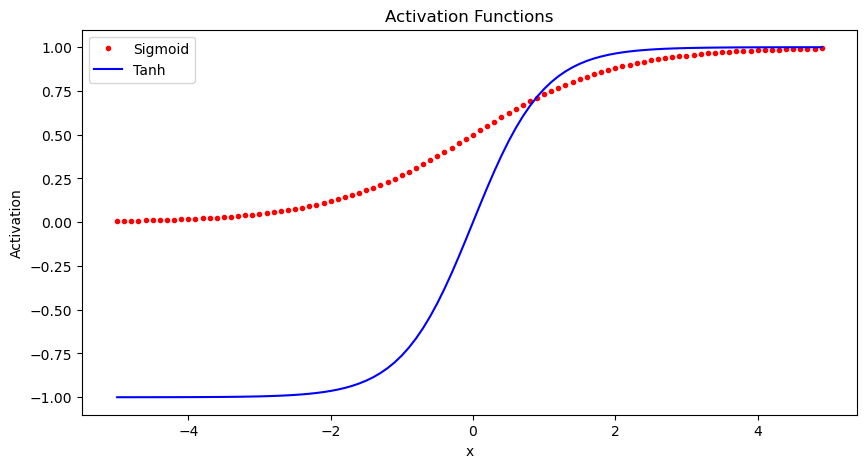

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

# Sigmoid activation function
sigmoid = 1 / (1 + np.exp(-x))

# Tanh activation function
tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)) 

# Plot the activation functions
plt.figure(figsize=(10,5))
plt.plot(x, sigmoid, 'r.', label='Sigmoid')
plt.plot(x, tanh, 'b-', label='Tanh')
plt.legend()
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.show()

### Derivatives

Let's now calculate the derivate of the sigmoid function and see how it saturates.

In [2]:
import sympy as sp
# Compute derivative of the sigmoid function
x = sp.Symbol('x')
sigmoid = 1 / (1 + sp.exp(-x))
derivative = sp.diff(sigmoid, x)
print(derivative)

exp(-x)/(1 + exp(-x))**2


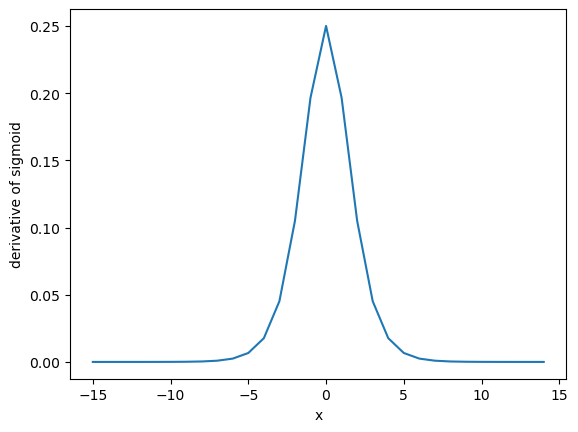

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.arange(-15,15)
dsigmoid = np.exp(-x1)/(1 + np.exp(-x1))**2
plt.plot(x1, dsigmoid)
plt.xlabel('x')
plt.ylabel('derivative of sigmoid')
plt.show()

> Notice how the sigmoid values saturate outside the range of (-5, 5). Any higher values will give almost zero gradient. This is called as the vanishing gradient problem.

**ReLU** The Rectified Linear Unit (ReLU) thresholds the input at zero, returning 0 for negative values and the raw input for positive values. It helps avoid vanishing gradients and is computationally efficient. However, it has a problem with "dying" neurons if inputs are consistently negative. For example, if a neuron in the first layer learns weights that result in a negative input, it will output 0. In backpropagation, since the gradient of the ReLU function is 0 for negative inputs, this neuron will not update its weights. Over time it will not activate on any data and is considered "dead".

This limits the model capacity as neurons can effectively die and remain inactive for the rest of training. LeakyReLU solves this by having a small negative slope (e.g. 0.01x), so even when inputs are negative it will propagate some gradient to update weights.

$$ f(x) = \max(0, x)$$

Use ReLU for hidden layers in networks where your inputs are always positive. It trains faster than sigmoid/tanh.

**LeakyReLU**

The Leaky ReLU introduces a small slope (e.g. 0.01x) for negative values instead of threshholding at zero. This helps solve the "dying neuron" problem of ReLU units. The small negative slope avoids saturation while keeping gradients flowing even for negative regions.

$$f(x) = \max(\alpha x, x)$$

Use LeakyReLU as a general purpose activation function that avoids both saturation and dying neurons.

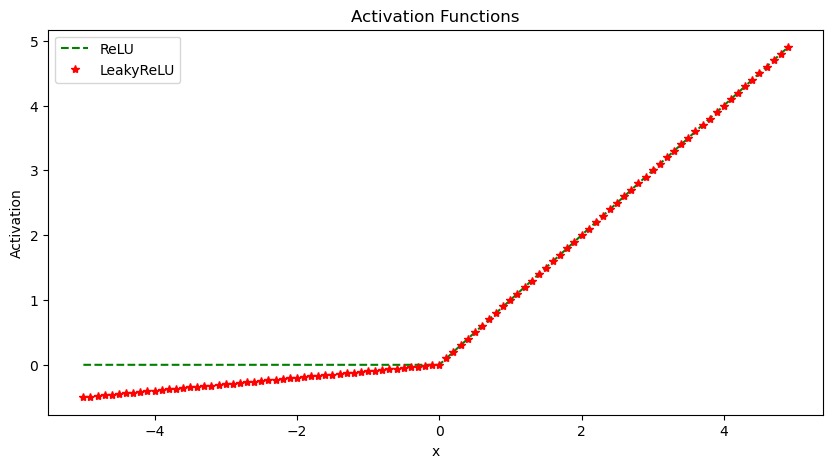

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

# ReLU activation function
relu = np.maximum(0, x)

# LeakyReLU activation function
leaky_relu = np.maximum(0.1*x, x)

# Plot the activation functions
plt.figure(figsize=(10,5))
plt.plot(x, relu, 'g--', label='ReLU')
plt.plot(x, leaky_relu, 'r*', label='LeakyReLU')
plt.legend()
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.show()

## Perceptron: An example

Consider the following example of how a perceptron works. We have bias $b=1.0$ and $\mathbf{w} = [3; -2]$. 

$$
\begin{align}
\hat{y} & = g (b + (\boldsymbol{w}^T\boldsymbol{x})) \\
\hat{y} & = g (1 + (\begin{bmatrix} 3 \\ -2 \end{bmatrix}^T \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}))\\
\hat{y} & = g (1 + (3 * x_1 - 2 * x_2)) \\
\end{align}
$$

The term inside the non-linear function $g$ $(1 + 3 x_1 - 2 x_2)$ is a line in 2D. 

We can plot all possible inputs to this neural network on a decision boundary. This two-dimensional line acts as a plane separating the input space. The plane has directionality - inputs on one side produce a certain output, while inputs on the other side produce the opposite output. For example, the input [-1, 2] lies on one side of the plane and generates a positive output. When we plug the components into the equation, we get a negative number that passes through the nonlinear activation function, resulting in a positive value. Inputs on the other side of the decision boundary generate the opposite output due to the thresholding function. The sigmoid activation sits at this decision boundary, controlling how inputs move to one side or the other.

For $\boldsymbol{x} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$. We have

$$
\begin{align}
\hat{y} & = g (1 + (3 * x_1 - 2 * x_2)) \\
\hat{y} & = g (1 + (3 * -1  - 2 * 2)) \\
\hat{y} & = g (-6) \approx 0.002
\end{align}
$$

In this example, visualizing the full 2D input space is convenient because I can easily draw the decision boundary. However, most real-world problems have high-dimensional data. Image data contains thousands or millions of pixel values. Plotting decision boundaries is infeasible in high dimensions. This example provides intuition before building more complex models.

![nn-line](nn-line.png)
> Image credits: Alexander Amini, MIT

### Perceptron: An implementation

In [4]:
# Sigmoid function 
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Perceptron function
def perceptron(x, w, b):  
  # Calculate weighted sum
  z = np.dot(x, w) + b 
  y = sigmoid(z)
  return y

x = np.array([-1, 2])      # Example inputs   
w = np.array([3.0, -2.0])  # Example weights 
b = 1.0                    # Example bias

# Generate prediction
y = perceptron(x, w, b)

# Print prediction
print('Prediction: %.3f' % (y))

Prediction: 0.002


> 💡 As we are using the `sigmoid` activation function, try varying the input `x` to see how the output `y` changes. Try for a different input `x`, which is below the line.

### Single and multi-output perceptrons


A single perceptron neuron can be built up into a full neural network model. The key steps for a perceptron are:

* Dot product of inputs and weights
* Add bias
* Apply non-linear activation function

These steps propagate information to produce the output. In a neural network, every neuron performs these computations.

$$z = b + \sum_{j = 1}^m w_j x_j$$

To create a multi-layer perceptron with multiple outputs, we use multiple perceptrons in the output layer. Each perceptron controls one output, but all perceptrons share the same inputs.

To implement a multi-layer perceptron network from scratch:

* Initialize a weight matrix $\boldsymbol{w}$, where each row contains the weights for one perceptron.

* Initialize a bias vector $b$, one bias term per perceptron.

* Define a forward propagation function to pass inputs through the network:
    -  Compute the dot product of inputs $x$ and weights  $\boldsymbol{w}$
    -  Add the bias vector $b$
    -  Apply non-linear activation function $g(z)$
    -  Return outputs

$$z = b_i + \sum_{j = 1}^m w_{j,i} x_{j,i}$$

Because all inputs are densely connected to all outputs, these layers are called **Dense Layers**.

This forward function defines the computations for a complete neural network layer. Stacking layers together allows building deep networks with multiple nonlinear transformations.


![ouput of perceptrons](multioutput-perceptrons.png)

### Single-Layer Neural Network

A single layer neural network, also known as a perceptron, is the simplest type of neural network. It consists of a single layer of input nodes fully connected to a layer of output nodes.
        
Let's now focus on a single neuron $z_2$. Here $z_2$ takes the weighted inputs from $\boldsymbol{x}$ added to the bias term. 
        
$$z_2 = b_2^{(1)} + \sum_{j=1}^m w_{j,2}^{(1)} x_j = b_2^{(1)} + w_{1,2}^{(1)}x_1 + w_{2,2}^{(1)}x_2 + w_{m,2}^{(1)}x_m$$

![Single layer NN](single-layer-nn1.png)

Hidden layers are layers in a neural network that sit between the input layer and the output layer. While the input and output layers connect to the external world, hidden layers only connect to other neurons within the network.

Hidden layers enable neural networks to learn more complex relationships between inputs and outputs. Specifically, hidden layers allow the network to model nonlinear relationships, which is crucial for solving more difficult problems.

The power of deep neural networks comes from having multiple hidden layers. Each layer transforms the representation of the data into a slightly more abstract representation. With enough layers, very complex functions can be modeled.

The number of hidden layers and neurons per layer are part of the neural network architecture. Tuning the hidden layer structure is an important part of applying neural networks to a problem.


We define a hidden layer as: 

$$z_2 = b_i^{(1)} + \sum_{j=1}^m w_{j,i}^{(1)} x_j$$

Final output: 

$$\hat{y}_i = g(b_i^{(2)} + \sum_{j=1}^{d_1} w_{j,i}^{(2)} g(z_j))$$


![Single layer NN](single-layer-nn2.png)

## Using neural networks to model stress-strain behavior (Bingham model)

### Bingham model

The Bingham constitutive model describes the flow behavior of viscoplastic fluids that behave as rigid solids at low stresses but flow as viscous fluids at high stresses. There is a critical yield stress $\tau_y$ that must be exceeded before flow occurs. Once the yield stress is exceeded, the material flows as a viscous fluid with a constant plastic viscosity $\mu$. The constitutive equation is:

$\tau = \tau_y + \mu\dot{\gamma}$

Where $\tau$ is the shear stress, $\tau_y$ is the yield stress, $\mu$ is the plastic viscosity, and $\dot{\gamma}$ is the shear rate. For $\tau < \tau_y$, the shear rate is zero. For $\tau > \tau_y$, the shear rate is proportional to the excess shear stress ($\tau - \tau_y$) and the viscosity $\mu$. The Bingham model captures the dual rigid and viscous behaviors seen in materials like toothpaste, mayonnaise, concrete, drilling muds, etc. It provides a simple yet powerful constitutive framework for modeling viscoplastic fluid flows.

![bingham](bingham.png)

### Modeling Bingham fluid with single layer neural network

Let us now model the bingham fluid model using a neural network. The first step is to generate data. 

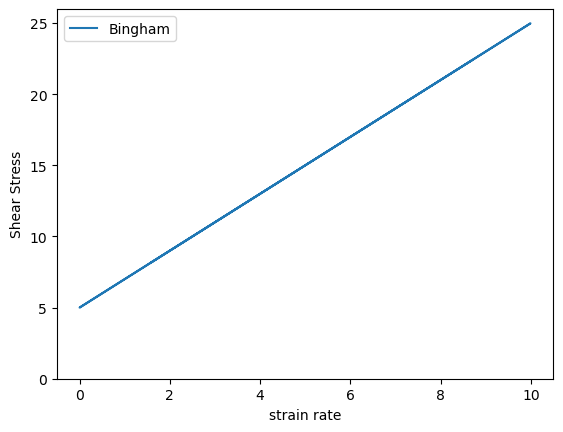

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
num_samples = 1000

# Range of strain rate values
v_values = np.random.rand(num_samples, 1) * 10
# Yield stress
tau0_true = 5.0
# Visocisty
mu_true = 2.0
# Shear stress = yield stress + viscosity * strain rate
y_true = tau0_true + mu_true * v_values

# Plot the bingham model
plt.plot(v_values, y_true, label='Bingham')
plt.ylim(0, None)
plt.xlabel('strain rate')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

### Initializing the single layer network

We are now going to define a single layer single neuron network, which has a bias value $b$ and a weight vector $w$ which is a scalar. We are only using the simple neuron without any non-linear activation function. 

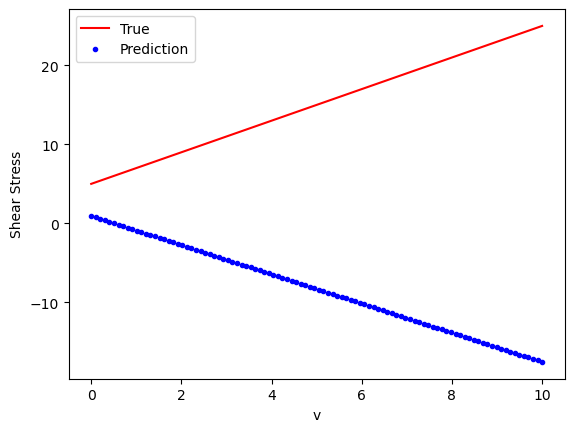

In [6]:
# Initialize model weights as random
weights = np.random.randn(1, 1)
bias = np.random.randn()

# Define the bingham NN model
def bingham_nn(x, w, b):
    return np.dot(x, w) + b

# Evaluation
v_eval = np.linspace(0, 10, 100).reshape(-1, 1)
y_true_eval = tau0_true + mu_true * v_eval
y_pred_eval = bingham_nn(v_eval, weights, bias)

# Plot
plt.plot(v_eval, y_true_eval, 'r-', label='True')
plt.plot(v_eval, y_pred_eval, 'b.', label='Prediction')
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

So, what went wrong? Our predictions do not match the true Bingham model. We have not actually trained the neural network. 

## Training a neural network

Neural networks are trained using an optimization algorithm that iteratively updates the network's weights and biases to minimize a loss function. The loss function measures how far the network's predictions are from the true target outputs in the training data. It is a measure of the model's error.

Some common loss functions include:

* Mean squared error (MSE) - The average of the squared differences between the predicted and actual values. Measures the square of the error. Used for regression problems.

* Cross-entropy loss - Measures the divergence between the predicted class probabilities and the true distribution. Used for classification problems. Penalizes confident incorrect predictions.

* Hinge loss - Used for Support Vector Machines classifiers. Penalizes predictions that are on the wrong side of the decision boundary.

Loss optimization is the process of finding the network weights that acheives the lowest loss.

$$ 
\begin{align}
\boldsymbol{w^*} &= \argmin_{\boldsymbol{w}}\frac{1}{n}\sum_{i=1}^n \mathcal{L}(f(x^{(i)};\boldsymbol{w}),y^{(i)})\\
\boldsymbol{w^*} &= \argmin_{\boldsymbol{w}} J(\boldsymbol{w})
\end{align}
$$

The training process works like this:

1. **Initialization**: The weights and biases of the network are initialized, often with small random numbers.

2. **Forward Pass**: The input is passed through the network, layer by layer, applying the necessary transformations (e.g., linear combinations of weights and inputs followed by activation functions) until an output is obtained.

3. **Calculate Loss**: A loss function is used to quantify the difference between the predicted output and the actual target values.

4. **Backward Pass (Backpropagation)**: The gradients of the loss with respect to the parameters (weights and biases) are computed using the chain rule for derivatives. This process is known as backpropagation.

5. **Update Parameters**: The gradients computed in the backward pass are used to update the parameters of the network, typically using optimization algorithms like stochastic gradient descent (SGD) or more sophisticated ones like Adam. The update is done in the direction that minimizes the loss.

6. **Repeat**: Steps 2-5 are repeated using the next batch of data until a stopping criterion is met, such as a set number of epochs (full passes through the training dataset) or convergence to a minimum loss value.

7. **Validation**: The model is evaluated on a separate validation set to assess its generalization to unseen data.

### Gradient Descent
Gradient Descent is a first-order iterative optimization algorithm used to find the minimum of a differentiable function. In the context of training a neural network, we are trying to minimize the loss function. 

1. **Initialize Parameters**:

Choose an initial point (i.e., initial values for the weights and biases) in the parameter space, and set a learning rate that determines the step size in each iteration.

2. **Compute the Gradient**:

Calculate the gradient of the loss function with respect to the parameters at the current point. The gradient is a vector that points in the direction of the steepest increase of the function. It is obtained by taking the partial derivatives of the loss function with respect to each parameter.

3. **Update Parameters**:

Move in the opposite direction of the gradient by a distance proportional to the learning rate. This is done by subtracting the gradient times the learning rate from the current parameters:

$$\boldsymbol{w} = \boldsymbol{w} - \eta \nabla J(\boldsymbol{w})$$

Here, $\boldsymbol{w}$ represents the parameters, $\eta$ is the learning rate, and $\nabla J (\boldsymbol{w})$ is the gradient of the loss function $J$ with respect to $\boldsymbol{w}$.

4. **Repeat**:

Repeat steps 2 and 3 until the change in the loss function falls below a predefined threshold, or a maximum number of iterations is reached.

#### Algorithm:

1. Initialize weights randomly $\sim \mathcal{N}(0, \sigma^2)$
2. Loop until convergence
3.   Compute gradient, $\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$
4.   Update weights, $\boldsymbol{w} \leftarrow \boldsymbol{w} - \eta \frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$
5. Return weights

![SGD](sgd.gif)

Assuming a loss function is mean squared error (MSE). Let's compute the gradient of the loss with respect to the input weights. 

The loss function is mean squared error:

$$\text{loss} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Where $y_i$ are the true target and $\hat{y}_i$ are the predicted values.

To minimize this loss, we need to compute the gradients with respect to the weights $\mathbf{w}$ and bias $b$:

Using the chain rule, the gradient of the loss with respect to the weights is:
$$\frac{\partial \text{loss}}{\partial \mathbf{w}} = \frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i) \frac{\partial y_i}{\partial \mathbf{w}}$$

The term inside the sum is the gradient of the loss with respect to the output $y_i$, which we called $\text{grad\_output}$:
$$\text{grad\_output} = \frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)$$

The derivative $\frac{\partial y_i}{\partial \mathbf{w}}$ is just the input $\mathbf{x}_i$ multiplied by the derivative of the activation. For simplicity, let's assume linear activation, so this is just $\mathbf{x}_i$:

$$\therefore \frac{\partial \text{loss}}{\partial \mathbf{w}} = \mathbf{X}^T\text{grad\_output}$$

The gradient for the bias is simpler:
$$\frac{\partial \text{loss}}{\partial b} = \sum_{i=1}^{n}\text{grad\_output}_i$$

Finally, we update the weights and bias by gradient descent:

$$\mathbf{w} = \mathbf{w} - \eta \frac{\partial \text{loss}}{\partial \mathbf{w}}$$

$$b = b - \eta \frac{\partial \text{loss}}{\partial b}$$

Where $\eta$ is the learning rate.


```python
# training the neural network with gradient-based optimization
epochs = 1000       # Number of iterations
learning_rate = 0.1 # eta

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = bingham_nn(v_values, weights, bias)
    # Compute loss as MSE
    loss = ((y_pred - y_true) ** 2).mean()
    
    # Compute gradients
    grad_output = 2 * (y_pred - y_true) / num_samples
    grad_weights = np.dot(v_values.T, grad_output)
    grad_bias = grad_output.sum()

    # Update weights using gradient descent
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias
```

#### Variants:

There are several variants of Gradient Descent that modify or enhance these basic steps, including:

- **Stochastic Gradient Descent (SGD)**: Instead of using the entire dataset to compute the gradient, SGD uses a single random data point (or small batch) at each iteration. This adds noise to the gradient but often speeds up convergence and can escape local minima.

- **Momentum**: Momentum methods use a moving average of past gradients to dampen oscillations and accelerate convergence, especially in cases where the loss surface has steep valleys.

- **Adaptive Learning Rate Methods**: Techniques like Adagrad, RMSprop, and Adam adjust the learning rate individually for each parameter, often leading to faster convergence.

#### Limitations:

* It may converge to a local minimum instead of a global minimum if the loss surface is not convex.
* Convergence can be slow if the learning rate is not properly tuned.
* Sensitive to the scaling of features; poorly scaled data can cause the gradient descent to take a long time to converge or even diverge.


#### Effect of learning rate

The learning rate in gradient descent is a critical hyperparameter that can significantly influence the model's training dynamics. Let us now look at how the learning rate affects local minima, overshooting, and convergence:

1. Effect on Local Minima:

- High Learning Rate: A large learning rate can help the model escape shallow local minima, leading to the discovery of deeper (potentially global) minima. However, it can also cause instability, making it hard to settle in a good solution.

- Low Learning Rate: A small learning rate may cause the model to get stuck in local minima, especially in complex loss landscapes with many shallow valleys. The model can lack the "energy" to escape these regions.

2. Effect on Overshooting:

- High Learning Rate: If the learning rate is set too high, the updates may be so large that they overshoot the minimum and cause the algorithm to diverge, or oscillate back and forth across the valley without ever reaching the bottom. This oscillation can be detrimental to convergence.
   
- Low Learning Rate: A very low learning rate will likely avoid overshooting but may lead to extremely slow convergence, as the updates to the parameters will be minimal. It might result in getting stuck in plateau regions where the gradient is small.

3. Effect on Convergence:

- High Learning Rate: While it can speed up convergence initially, a too-large learning rate risks instability and divergence, as mentioned above. The model may never converge to a satisfactory solution.
   
- Low Learning Rate: A small learning rate ensures more stable and reliable convergence but can significantly slow down the process. If set too low, it may also lead to premature convergence to a suboptimal solution.

##### Finding the Right Balance:

Choosing the right learning rate is often a trial-and-error process, sometimes guided by techniques like learning rate schedules or adaptive learning rate algorithms like Adam. These approaches attempt to balance the trade-offs by adjusting the learning rate throughout training, often starting with larger values to escape local minima and avoid plateaus, then reducing it to stabilize convergence.

In [8]:
# This code cell creates an example for gradient descent 
# RUN THIS CELL AND MOVE ON TO THE NEXT ONE TO EXECUTE THE DIFFERENT CONDITIONS FOR GRADIENT DESCENT
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm

# Define the function and its derivative
def function(x):
    return x**4 - 6 * x**2 + 3 * x

def derivative(x):
    return 4 * x**3 - 12 * x + 3

# Gradient descent
def gradient_descent(initial_x, learning_rate, iterations):
    x = initial_x
    history = [x]

    for i in range(iterations):
        gradient = derivative(x)
        x -= learning_rate * gradient
        history.append(x)

    return history

def plot_gradient_descent(initial_x, learning_rate, iterations):
  # Running gradient descent
  history = gradient_descent(initial_x, learning_rate, iterations)

  # Plotting the animation
  fig, ax = plt.subplots()
  x_values = np.linspace(-3.5, 3.5, 400)
  ax.plot(x_values, function(x_values))
  ax.set_xlabel('W')
  ax.set_ylabel('J(W)')

  # Lists to hold the x and y values of the dots
  x_dots = []
  y_dots = []

  # Define the text label
  text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

  def update(frame):
      x = history[frame]
      y = function(x)
      x_dots.append(x)
      y_dots.append(y)
      text.set_text(f'Iteration {frame}: x = {x:.2f}')
      ax.scatter(x_dots, y_dots, c=range(len(x_dots)), cmap=cm.jet, lw=2)
      ax.plot(x_dots, y_dots, color='r', lw=0.5)
      return

  ani = FuncAnimation(fig, update, frames=range(len(history)), blit=False)


  # Display the animation
  html_output = HTML(ani.to_jshtml())
  return html_output

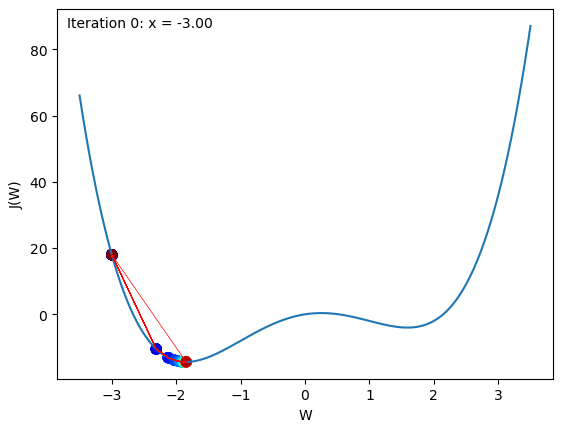

In [9]:
# Plot gradient descent

# Oscillating solution
#html = plot_gradient_descent(initial_x = 2.5, learning_rate = 0.14, iterations = 5)

# Stuck in local minima
# html = plot_gradient_descent(initial_x = 3.0, learning_rate = 0.0005, iterations = 50)

# Converging to global minima
html = plot_gradient_descent(initial_x = -3.0, learning_rate = 0.01, iterations = 20)

html

> 💡 Try the different settings to understand the effect of learning rate

An epoch in the training process of a neural network refers to one complete iteration over the entire training dataset. The optimization algorithm minimizes a predefined loss function during each epoch, reflecting the discrepancy between the predicted and actual target values.

Here is a step-by-step breakdown of what happens during an epoch:

1. **Batch processing**: The training dataset is partitioned into smaller subsets called batches. The batch size is a critical hyperparameter and has implications for the stochasticity of the gradient descent process. Smaller batches yield noisier gradients, which can aid in escaping local minima, whereas larger batches provide a more accurate estimate of the gradient.

1. **Forward Propagation**: For each batch, the model computes the predicted output through a series of mathematical operations defined by the architecture. This process is referred to as a "forward pass."

1. **Loss Computation**: The loss function, carefully chosen to align with the problem's objective, is computed using the predicted output and the true target values. This loss quantifies the error or the discrepancy between the prediction and the actual target values.

1. **Backward Propagation**: The gradients of the loss with respect to the model's parameters are computed using the chain rule. This process is known as "backpropagation" and forms the core of training deep learning models.

1. **Parameter Update**: The calculated gradients are used to update the model's parameters (such as weights and biases) using an optimization algorithm (e.g., SGD, Adam). The update is performed in a direction that reduces the loss, and the learning rate hyperparameter controls the step size of this update.

1. **Iteration over Batches**: Steps 2-5 are iteratively performed for each batch in the training data, constituting one entire epoch.

1. **Subsequent Epochs**: The entire process is repeated for a predefined number of epochs. Often, the data is shuffled between epochs to prevent any ordering biases in the training process.

Training a model for more epochs means the model has more opportunities to learn from the data. However, training for too many epochs may cause the model to "overfit" the training data, meaning that it becomes specialized to the training data at the expense of its ability to generalize to unseen data. Therefore, the number of epochs is a hyperparameter that needs to be carefully chosen and validated using a separate validation dataset.

### Bingham Neural Network

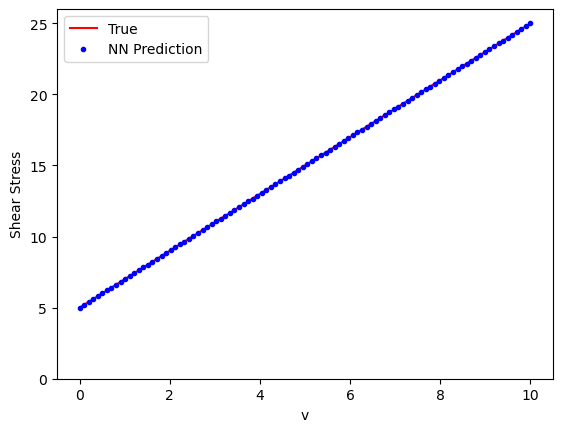

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
num_samples = 1000
v_values = np.random.rand(num_samples, 1) * 10
tau0_true = 5.0
mu_true = 2.0
y_true = tau0_true + mu_true * v_values

# Initialize model weights
weights = np.random.randn(1, 1)
bias = np.random.randn()
learning_rate = 0.01

# Training loop
epochs = 10000
# Loss history
losses = np.zeros(epochs)
for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(v_values, weights) + bias
    loss = ((y_pred - y_true) ** 2).mean()
    losses[epoch] = loss

    # Compute gradients
    grad_output = 2 * (y_pred - y_true) / num_samples
    grad_weights = np.dot(v_values.T, grad_output)
    grad_bias = grad_output.sum()

    # Update weights using gradient descent
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

# Evaluation
v_eval = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred_eval = np.dot(v_eval, weights) + bias
y_true_eval = tau0_true + mu_true * v_eval

# Plot
plt.plot(v_eval, y_true_eval, 'r-', label='True')
plt.plot(v_eval, y_pred_eval, 'b.', label='NN Prediction')
plt.ylim(0, None)
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

### The problem of overfitting

#### Definition of Overfitting
Overfitting occurs when a model performs exceptionally well on the training data but poorly on unseen data, such as validation or test data. This phenomenon is indicative of the model's inability to generalize from the training data to new, unseen examples.

#### Causes of Overfitting
1. **Complex Models**: Models with too many parameters relative to the number of training examples can easily fit the noise in the data, capturing spurious correlations.
2. **Insufficient Data**: A small dataset may not represent the underlying distribution well, allowing the model to memorize the data rather than learn the underlying pattern.
3. **Noisy Data**: If the training data contain errors or irrelevant information, a complex model may learn these inaccuracies.

#### Consequences of Overfitting
- **Poor Generalization**: An overfitted model will perform poorly on new data, limiting its usefulness in making predictions on unseen examples.
- **Misleading Performance Metrics**: Overfitting can lead to overly optimistic performance estimates on the training data, which do not translate to real-world performance.

#### How to Detect Overfitting
- **Validation Set**: By evaluating the model on a separate validation set, one can compare performance on the training data and unseen data. A significant drop in performance on the validation set is indicative of overfitting.
- **Learning Curves**: Plotting the training and validation loss (or other metrics) as a function of training epochs can reveal overfitting. If the validation loss starts increasing while the training loss continues to decrease, this is a classic sign of overfitting.

#### Strategies to Combat Overfitting
1. **Regularization**: Techniques like L1 or L2 regularization add penalties to the loss function that discourage the model from fitting the noise in the data.
2. **Early Stopping**: Monitoring the validation loss and stopping training when it starts to increase can prevent the model from overfitting the training data.
3. **Cross-Validation**: This method involves splitting the data into several subsets and validating the model on different subsets, providing a more robust estimate of its generalization ability.
4. **Pruning**: For tree-based models, pruning involves removing sections of the tree that provide little predictive power.
5. **Using More Data**: If available, more training examples can make it harder for the model to fit the noise.
6. **Simplifying the Model**: Choosing a model with fewer parameters or constraining its complexity can help prevent overfitting.


Overfitting is a central challenge in SciML, representing a failure of the model to abstract the underlying patterns in the data. It underscores the principle that a model performing well on the training data does not necessarily translate to good real-world performance. Understanding and combating overfitting are essential skills for graduate students in SciML, requiring both theoretical understanding and practical experience with various techniques and strategies.


![overfitting](overfitting.png)
> Example of under and overfitting the data

#### How to detect overfitting with validation dataset

In practice, the learning algorithm does not actually ﬁnd the best function, but merely one thatsigniﬁcantly reduces the training error. These additional limitations, such as theimperfection of the optimization algorithm, mean that the learning algorithm’seﬀective capacitymay be less than the representational capacity of the modelfamily.

Our modern ideas about improving the generalization of machine learningmodels are reﬁnements of thought dating back to philosophers at least as early as Ptolemy. Many early scholars invoke a principle of parsimony that is now mostwidely known as `Occam’s razor` (c. 1287–1347). This principle states that amongcompeting hypotheses that explain known observations equally well, we shouldchoose the “simplest” one. This idea was formalized and made more precise in the twentieth century by the founders of statistical learning theory.

We must remember that while simpler functions are more likely to generalize(to have a small gap between training and test error), we must still choose asuﬃciently complex hypothesis to achieve low training error. Typically, trainingerror decreases until it asymptotes to the minimum possible error value as modelcapacity increases (assuming the error measure has a minimum value). Typically generalization error has a U-shaped curve as a function of model capacity.

At the left end of the graph, training error and generalization errorare both high. This is the **underfitting regime**. As we increase capacity, training error decreases, but the gap between training and generalization error increases. Eventually,the size of this gap outweighs the decrease in training error, and we enter the **overfitting regime**, where capacity is too large, above the **optimal capacity**.

![Training validation fit](training-validation-fit.png)

> Image credits: Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.

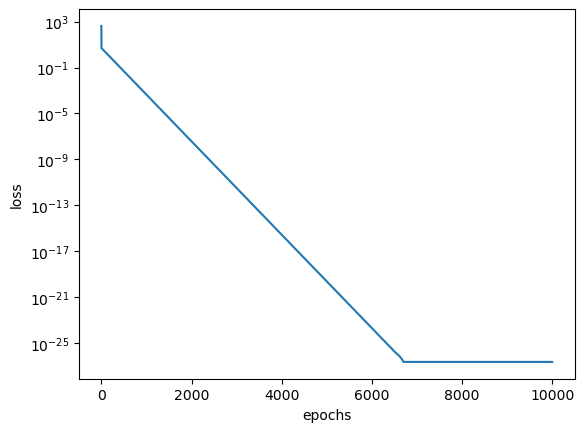

In [11]:
# Let us now plot the loss history of training with epochs
plt.figure()
plt.semilogy(np.arange(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### Weights and biases

For simple models, we can also plot the weights and biases to understand how well the model fits the true Bingham response. In the original Bingham model, we had a yield stress $\tau_y = 5.0$ (bias $b$) and a viscosity $\mu = 2$ (weight $\boldsymbol{w}$).


In [12]:
print("Weights: {}".format(weights[0]))
print("Bias: %.2f" % (bias))

Weights: [2.]
Bias: 5.00


We see that the weight and biases are pretty close to the actual values of the Bingham model data on which it was trained. For more complex NN, we could also plot how weights and biases change over epochs.

### PyTorch version of Bingham Model

PyTorch is a popular open source machine learning library for Python developed by Facebook. It is used for building and training deep neural networks. Here is how to construct a simple neural network with PyTorch:

First, import PyTorch:

```python
import torch
import torch.nn as nn
import torch.nn.functional as F
```

Define the neural network class inheriting from `nn.Module`. In the constructor initialize the layers:

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(1, 1) 
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc(x))
        return x
```

Alternatively, we can also define a new network using a single equivalent line as:

```python
Net = nn.Sequential(nn.Linear(1, 1), nn.ReLU())
```

This creates a simple neural net with 1 fully connected layer and a non-linear activation function ReLU.

Then create the model instance and set the loss function and optimizer:

```python
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```

That's it! We now have a simple single layer neural network defined in PyTorch. To train it on data we need to loop through datasets, perform forward passes, compute loss, backpropagate and update weights.

## Neural Network Example #1

> Bingham model (only shear strain rate $\dot{\gamma}$ input)

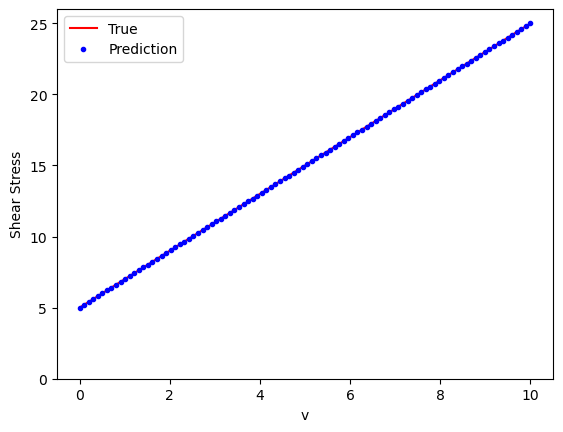

In [1]:
# PyTorch version of NN for Bingham Plastic model
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


# Generate synthetic data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_true = 5.0
mu_true = 2.0
y_true = tau0_true + mu_true * v_values

# Bingham Neural Network model
model = nn.Sequential(nn.Linear(1, 1), nn.ReLU())

# Loss and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 5000
for epoch in range(epochs):
    model.zero_grad()
    y_pred = model(v_values)
    loss = loss_function(y_pred, y_true)
    loss.backward()
    optimizer.step()

# Evaluation
v_eval = torch.linspace(0, 10, 100).view(-1, 1)
y_pred = model(v_eval)
y_true_eval = tau0_true + mu_true * v_eval

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True', )
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Prediction')
plt.ylim(0, None)
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

### TensorFlow 2.0/Keras

TensorFlow 2.0 is an open-source machine learning framework developed by Google, designed to facilitate the building, training, and deployment of various machine learning models. TensorFlow 2.0 brought several improvements over its predecessor, including ease of use, more robust support for distributed training, and integration with Keras as its high-level API.

Initially developed as an independent neural network library, Keras serves as a user-friendly interface for building deep learning models. It provides a set of high-level building blocks to create neural networks, making it easier to design and experiment with complex architectures. With TensorFlow 2.0, Keras became the default high-level API, allowing researchers and practitioners to harness the power of TensorFlow with a more accessible and streamlined interface.

#### Tensors

Tensors are the primary data structure used in TensorFlow. A tensor is a multidimensional array representing anything from a scalar to a high-dimensional matrix. The dimensions of a tensor are referred to as "ranks," with rank 0 corresponding to a scalar and rank 1 to a vector.

Tensors are used to represent the input, output, and transformations within the computational graph. They are immutable, meaning their values cannot be changed once set, and they are strongly typed, meaning that they have a specific datatype (e.g., float32, int32).

Using tensors enables TensorFlow to be highly versatile and capable of running on various hardware platforms (including GPUs and TPUs), as the same tensor operations can be efficiently mapped to different computational devices.


#### TensorFlow Computational Graph

The computational graph is a core concept in TensorFlow, representing the sequence of operations performed during a computation. Here is how it works:

1. **Graph Construction**: In TensorFlow, computations are represented as a directed acyclic graph. Each node in the graph corresponds to an operation (e.g., addition, multiplication), and the edges represent the flow of data encapsulated as tensors. This graph-centric design allows for a high degree of parallelism and optimization by the underlying TensorFlow runtime.

1. **Eager Execution**: Starting with TensorFlow 2.0, eager execution became the default mode. Eager execution means operations are immediately executed as soon as they are called, and the results can be retrieved without having to run a separate session. This mode simplifies the development process and improves debugging capabilities.

1. **Graph Execution**: For more optimized execution, TensorFlow 2.0 still allows for graph execution. The computational graph is first compiled in this mode, and then the execution is optimized for the underlying hardware (like GPUs). This can lead to significant performance gains, especially in large-scale models.

4/4 [==============================] - 0s 543us/step


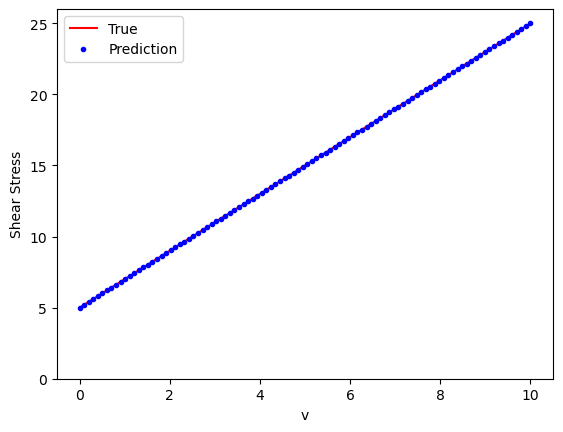

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Generate synthetic data
num_samples = 10000
v_values = np.random.rand(num_samples, 1) * 10
tau0_true = 5.0
mu_true = 2.0
y_true = tau0_true + mu_true * v_values

# Bingham Neural Network model
model = Sequential([
    Dense(1, input_shape=(1,)),
    ReLU()
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Training the model
model.fit(v_values, y_true, epochs=5000, verbose=0)

# Evaluation
v_eval = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(v_eval)
y_true_eval = tau0_true + mu_true * v_eval

# Plot
plt.plot(v_eval, y_true_eval, 'r-', label='True')
plt.plot(v_eval, y_pred, 'b.', label='Prediction')
plt.ylim(0, None)
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

## Neural Network Example #2

> Bingham with 3 input parameters ($\dot{\gamma}, \tau_y, \mu$)

We now have three inputs ($\dot{\gamma}, \tau_y, \mu$) and predict the yield stress as the output. The main change other than the input is to define the network with 3 input layers:

```python
# Model
model = nn.Sequential(
    nn.Linear(3, 1),
    nn.ReLU()
)
```

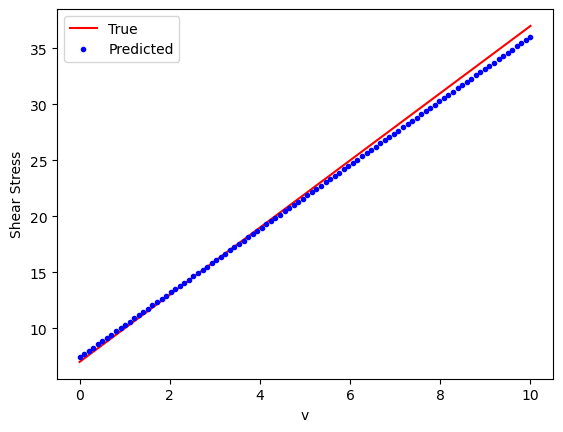

In [14]:
# Generate data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_values = torch.rand(num_samples, 1) * 10
mu_values = torch.rand(num_samples, 1) * 5

# Inputs
inputs = torch.cat([v_values, tau0_values, mu_values], dim=1)

# Targets
y_true = tau0_values + mu_values * v_values

# Model
model = nn.Sequential(
    nn.Linear(3, 1),
    nn.ReLU()
)

# Training
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5000
for epoch in range(epochs):
    y_pred = model(inputs)
    loss = loss_fn(y_pred, y_true)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluation
v_eval = torch.linspace(0, 10, 100).view(-1, 1)
tau0_eval = 7 * torch.ones_like(v_eval)
mu_eval = 3 * torch.ones_like(v_eval)

inputs_eval = torch.cat([v_eval, tau0_eval, mu_eval], dim=1)

y_pred = model(inputs_eval)
y_true_eval = tau0_eval + mu_eval * v_eval

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True')
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Predicted')

plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

## Neural Network Example #3

> A non-linear Herschel-Bulkley model

Herschel-Bulkley model is a non-linear plastic model. We will try to fit the non-linear model by introducing additional hidden layer with 64 neurons. 

![Herschel Bulkley](herschel-bulkley.png)

The PyTorch Neural Network requires four input parameters ($\nu, k, \dot{\gamma}, \tau_0)$ and two hidden layers. 

```python
# Model
model = nn.Sequential(
   nn.Linear(4, 64),
   nn.Tanh(),
   nn.Linear(64,1)
)
```

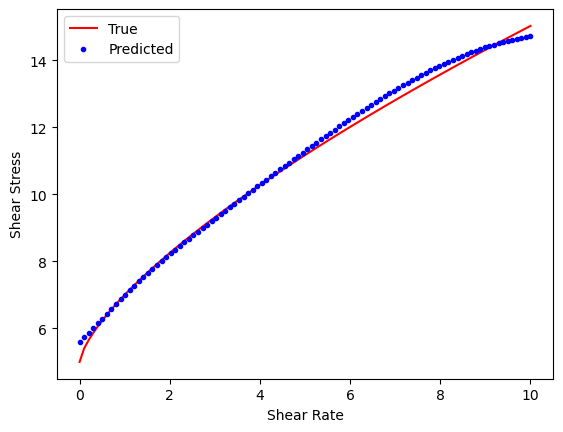

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_values = torch.rand(num_samples, 1) * 5
k_values = torch.rand(num_samples, 1) * 2
n_values = torch.rand(num_samples, 1) * 0.5 + 0.5 # 0.5 - 1.0

# Inputs
inputs = torch.cat([v_values, tau0_values, k_values, n_values], dim=1)

# Targets
y_true = tau0_values + k_values * (v_values**n_values)

# Model
model = nn.Sequential(
   nn.Linear(4, 64),
   nn.Tanh(),
   nn.Linear(64,1)
)

# Training
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

epochs = 5000
for epoch in range(epochs):
   y_pred = model(inputs)
   loss = loss_fn(y_pred, y_true)

   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

# Evaluation
v_eval = torch.linspace(0, 10, 100).unsqueeze(1)
tau0_eval = 5 * torch.ones_like(v_eval)
k_eval = 2 * torch.ones_like(v_eval)
n_eval = 0.7 * torch.ones_like(v_eval)

inputs_eval = torch.cat([v_eval, tau0_eval, k_eval, n_eval], dim=1)
y_pred = model(inputs_eval)

y_true_eval = tau0_eval + k_eval * (v_eval**n_eval)

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True')
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Predicted')
plt.xlabel('Shear Rate')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

Hyperparameters are values that we set before beginning the training process. They guide the learning process and differ from model parameters, which are learned from the training data. Below are some key hyperparameters:

1. **Learning Rate**: This hyperparameter controls the step size when updating the model's weights. If you set it too low, the model converges slowly. If you set it too high, the learning process might diverge.

1. **Batch Size**: This defines the number of training examples you use in one iteration to update the model's weights. A smaller batch size typically leads to a regularizing effect and lower generalization error, while a larger batch size results in faster training but may converge to a suboptimal solution.

1. **Number of Epochs**: You set the number of epochs to define how many times the learning algorithm will work through the entire training dataset. An epoch is a full pass through all training samples.

1. **Regularization Parameters**: If you apply regularization techniques like L1 or L2, you must set the strength of the penalty as a hyperparameter. Regularization adds penalties to the model parameters to prevent overfitting.

1. **Optimization Algorithm**: You choose the optimization algorithm (e.g., SGD, Adam, RMSProp) and its specific parameters (e.g., momentum) as hyperparameters.

1. **Network Architecture**: The structure of the neural network, including the number of hidden layers, the number of units in each layer, the activation functions, etc., is determined by hyperparameters that you set.

1. **Initialization**: You decide how to set the model's weights before training, significantly affecting learning. Choices like Xavier or He initialization have corresponding hyperparameters you must set.

1. **Early Stopping**: You can also set parameters related to when to stop training, such as if the validation error stops improving. These choices are considered hyperparameters.

Hyperparameters play a vital role in the behavior and performance of a learning algorithm. Finding the best set of hyperparameters, a process called hyperparameter tuning or optimization is essential in training an effective model. Methods for hyperparameter tuning include grid search, random search, Bayesian optimization, and others.

> 💡 Try to change the hyperparameters (learning rate, number of layers in the neural network and activation function) to reduce the error.

> 📖 Reading Activity: [Do ML models memorize or generalize?](https://pair.withgoogle.com/explorables/grokking/)